In [ ]:
#EEE 485: Statsitical Leaning and Data Analytics Term Project
#Logistic Regression Algorithm Implementation

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [ ]:
file_path = "UCI_Credit_Card.csv"

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
print(data)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [ ]:
column_names = data.columns

In [ ]:
print(column_names)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [ ]:
X1 =  data['LIMIT_BAL'].values #
X2 =  data['SEX'].values
X3 =  data['EDUCATION'].values
X4 =  data['MARRIAGE'].values
X5 =  data['AGE'].values       #
X6 =  data['PAY_0'].values
X7 =  data['PAY_2'].values
X8 =  data['PAY_3'].values
X9 =  data['PAY_4'].values
X10 = data['PAY_5'].values
X11 = data['PAY_6'].values
X12 = data['BILL_AMT1'].values #
X13 = data['BILL_AMT2'].values #
X14 = data['BILL_AMT3'].values #
X15 = data['BILL_AMT4'].values #
X16 = data['BILL_AMT5'].values #
X17 = data['BILL_AMT6'].values #
X18 = data['PAY_AMT1'].values  #
X19 = data['PAY_AMT2'].values  #
X20 = data['PAY_AMT3'].values  #
X21 = data['PAY_AMT4'].values  #
X22 = data['PAY_AMT5'].values  #
X23 = data['PAY_AMT6'].values  #

main_design_matrix = np.column_stack((X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X17,X18,X19,X20,X21,X22,X23))

In [ ]:
def normalize(predictor):
    mean_value = np.mean(predictor)
    std_variance = np.std(predictor)
    normalized = (predictor - mean_value)/std_variance
    return normalized

In [ ]:
n = 30000
p = 24
ones = np.ones(n)
ones = np.reshape(ones,(n,1))

X = np.column_stack((ones,normalize(X1),normalize(X2),  normalize(X3), normalize(X4), normalize(X5), normalize(X6),\
                          normalize(X7),normalize(X8),  normalize(X9), normalize(X10),normalize(X11),normalize(X12),\
                          normalize(X13),normalize(X14),normalize(X15),normalize(X16),normalize(X17),\
                          normalize(X18),normalize(X19),normalize(X20),normalize(X21),normalize(X22),\
                          normalize(X23)))

print(X.shape)

(30000, 24)


In [ ]:
Y = data['default.payment.next.month'].values

In [ ]:
Y = np.reshape(Y,(30000,1))
print(Y.shape)

(30000, 1)


In [ ]:
Beta = np.zeros((24,1))
print(Beta.shape)

(24, 1)


In [ ]:
Pi_vector = np.exp(np.dot(X,Beta))/(ones + np.exp(np.dot(X,Beta)))
Pi_complement = ones - Pi_vector
print(Pi_vector.shape)
print(Pi_complement.shape)

(30000, 1)
(30000, 1)


In [ ]:
W_matrix = np.eye(X.shape[0])
diagonal_indices = np.diag_indices_from(W_matrix)
diagonal_values = np.multiply(Pi_vector, Pi_complement)
diagonal_values = diagonal_values.flatten()
print(diagonal_values.shape)
W_matrix[diagonal_indices] = diagonal_values
print(W_matrix)
print(W_matrix.shape)

(30000,)
[[0.25 0.   0.   ... 0.   0.   0.  ]
 [0.   0.25 0.   ... 0.   0.   0.  ]
 [0.   0.   0.25 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.25 0.   0.  ]
 [0.   0.   0.   ... 0.   0.25 0.  ]
 [0.   0.   0.   ... 0.   0.   0.25]]
(30000, 30000)


In [ ]:
def newton_raphson(Y,X_matrix,Beta):

    error = 0.001
    ones = np.ones(X_matrix.shape[0])
    ones = np.reshape(ones,(X_matrix.shape[0],1))
    Beta_new = Beta
    Beta_old = Beta
    
    max_iteration = 20
    count = 0
    
    while count != max_iteration:

        Beta_old2 = Beta_old
        
        # Calculate Pi_vector
        #Pi_vector = np.exp(np.dot(X_matrix, Beta)) / (1 + np.exp(np.dot(X_matrix, Beta)))
        Pi_vector = 1/ (1 + np.exp(-np.dot(X_matrix, Beta_old)))
        Pi_complement = ones - Pi_vector
        
        # Update W_matrix
        W_matrix = np.eye(X_matrix.shape[0])
        diagonal_indices = np.diag_indices_from(W_matrix)
        diagonal_values = np.multiply(Pi_vector, Pi_complement)
        diagonal_values = diagonal_values.flatten()
        W_matrix[diagonal_indices] = diagonal_values
        
        # Update Beta_new using Newton-Raphson update rule
        X_t = np.transpose(X_matrix) 
        A = np.dot(np.dot(X_t, W_matrix), X_matrix)
        A_inv = np.linalg.inv(A)
        
        Beta_new = Beta_old + np.dot(np.dot(A_inv, X_t), (Y - Pi_vector))
        
        Beta_old = Beta_new
        count += 1
        
        if np.all(Beta_new - Beta_old) < error:
            break

    print(count)
    return Beta_new


In [ ]:
result = newton_raphson(Y,X,Beta)
print(result)

1
[[-1.1152    ]
 [-0.0469843 ]
 [-0.02843041]
 [-0.04782275]
 [-0.04973559]
 [ 0.05196965]
 [ 0.43020863]
 [ 0.093169  ]
 [ 0.05588879]
 [ 0.01572184]
 [ 0.02583352]
 [ 0.00364319]
 [-0.1833402 ]
 [ 0.04518122]
 [ 0.00833649]
 [-0.01748152]
 [-0.00498218]
 [ 0.0274562 ]
 [-0.04927105]
 [-0.01927943]
 [-0.00202374]
 [-0.01579605]
 [-0.0208367 ]
 [-0.00694716]]


In [ ]:
def gradient_descent(Y,X_matrix,Beta,max_iteration):

    learning_rate = 0.01
    error = 0.001
    Beta_new = Beta
    Beta_old = Beta

    X_t = np.transpose(X_matrix)
    
    count = 0

    for iteration in range(max_iteration):

        # Calculate Pi_vector
        Pi_vector = 1/ (1 + np.exp(-np.dot(X_matrix, Beta_old)))

        Beta_new = Beta_old - learning_rate*np.dot(X_t,(Y - Pi_vector))

        if np.linalg.norm(Beta_new - Beta_old) < error:
            break

        Beta_old = Beta_new

    else:
        print("Warning: Maximum iterations reached without convergence.")

    return Beta_new

In [ ]:
resultGD = gradient_descent(Y,X,Beta,100)
print(resultGD)

C:\Users\melih\AppData\Local\Temp\ipykernel_23148\2505300662.py:15: RuntimeWarning: overflow encountered in exp
  Pi_vector = 1/ (1 + np.exp(-np.dot(X_matrix, Beta_old)))


[[ 10402.90475602]
 [  9796.84287192]
 [  1874.76628059]
 [ -3670.88767673]
 [  -411.81868907]
 [   735.92206016]
 [-11339.37543166]
 [-11794.88178528]
 [-11425.34627441]
 [-11101.19900919]
 [-10770.99504606]
 [-10409.48703488]
 [    22.23823351]
 [  -243.22426783]
 [  -285.16317722]
 [  -357.5145191 ]
 [  -417.16653338]
 [  -388.65870622]
 [  2956.24972557]
 [  2353.10752419]
 [  2636.7128762 ]
 [  2665.79055952]
 [  2738.8292693 ]
 [  2572.62107256]]


In [ ]:
y_prob_own = np.dot(X,result)

min_value = np.min(y_prob_own)
max_value = np.max(y_prob_own)

scaled_data = (y_prob_own - min_value) / (max_value - min_value)

In [ ]:
y_hat = np.empty((X.shape[0],1))
    
for i in range(X.shape[0]):
        
    if scaled_data[i,0] > 0.6:
        y_hat[i,0] = 1
    else:
        y_hat[i,0] = 0

In [ ]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(X.shape[0]):
    if (y_hat[i,0] == Y[i,0]) and (y_hat[i,0] == 1 and Y[i,0] == 1):
        TP += 1
    elif (y_hat[i,0] == Y[i,0]) and (y_hat[i,0] == 0 and Y[i,0] == 0):
        TN += 1
    elif (y_hat[i,0] != Y[i,0]) and (y_hat[i,0] == 0 and Y[i,0] == 1):
        FP += 1
    elif (y_hat[i,0] != Y[i,0]) and (y_hat[i,0] == 1 and Y[i,0] == 0):
        FN += 1
print("TP:",TP,"TN:",TN,"FP:",FP,"FN:", FN)

TP: 2774 TN: 21608 FP: 3862 FN: 1756


In [ ]:
precision = TP/(TP + FP)
recall  = TP/(TP + FN)
f1_score = 2*((precision*recall)/(precision+recall))
print(f1_score)

0.49686548450653767


C:\Users\melih\AppData\Local\Temp\ipykernel_23148\2075831249.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  feature_scores[i] = correlation_coeff


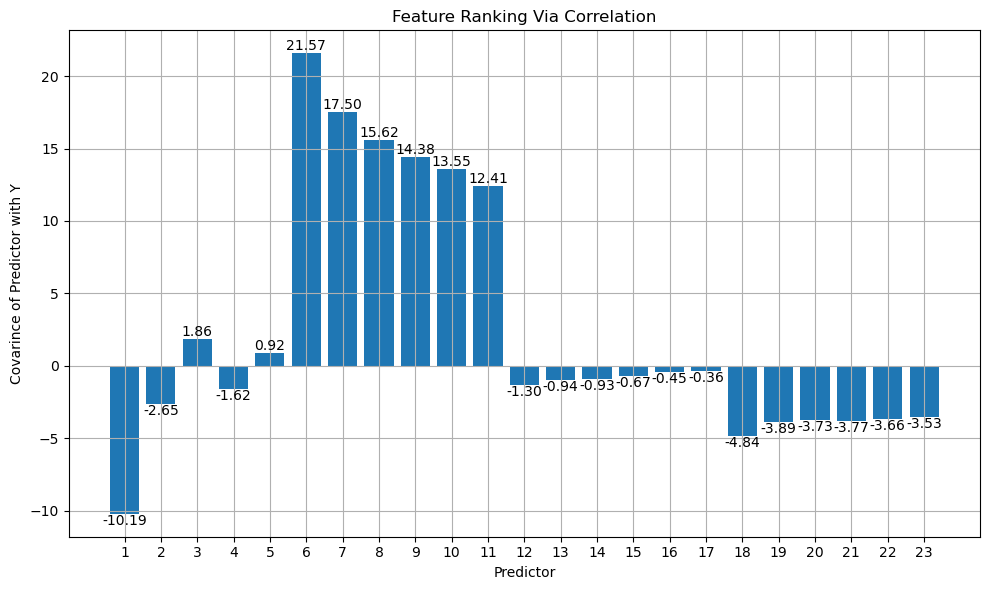

In [ ]:
#Feature Ranking Via Correlation
feature_scores = np.empty((23))

for i in range(0,23):

    column = X[:,i+1]
    column = np.reshape(column,(30000,1))
    response = np.reshape(Y,(30000,1))
        
    mean_of_response = np.mean(response)
    mean_of_column = np.mean(column)

    var_of_response = np.var(response)
    var_of_column = np.var(column)

    tilda_column = column - mean_of_column
    tilda_response = response - mean_of_response

    tilda_column_T = np.transpose(column)
    tilda_response_T = np.transpose(response)

    correlation_coeff = (np.dot(tilda_column_T,tilda_response))/\
        (np.sqrt(np.dot(tilda_column_T,tilda_column) + np.dot(tilda_response_T,tilda_response)))
    
    feature_scores[i] = correlation_coeff
# Create an index array
index_array = np.arange(1,24)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(index_array, feature_scores)
plt.xlabel('Predictor')
plt.ylabel('Covarince of Predictor with Y')
plt.title('Feature Ranking Via Correlation')

plt.xticks(index_array)

for i, value in enumerate(feature_scores,start=1):
    if value > 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
    elif value < 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top')

plt.grid(True)
plt.tight_layout()
plt.show()


In [314]:
def X_generator(main_design_matrix):

    n = 30000
    p = input("Enter predictor numbers: ")
    index_lst = p.split(",")
    int_lst = int_list = [int(num) for num in p]
    print(int_list)

    ones = np.ones(n)
    ones = np.reshape(ones,(n,1))

    X = ones

    for i in range(len(int_list)):

        X = np.column_stack((X,main_design_matrix[:,int_list[i]]))

    print(X)
    print(X.shape)
    return X

In [316]:
X_generator(main_design_matrix)

[1, 2, 3, 4]
1234


In [162]:
#SVM f1 score
precision_svm = 1646/(1646+797)
recall_svm = 1646/(1646 + 1613)
f1_score_svm = 2*((precision_svm*recall_svm)/(precision_svm+recall_svm))
print(f1_score_svm)

0.5773412837600842
